Text(0.5, 1.0, 'Power spectrum (np.fft.fft)')

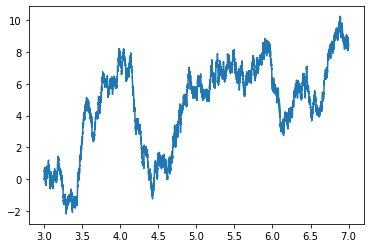

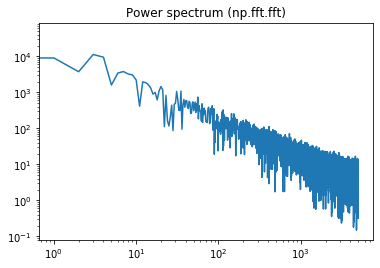

In [4]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import math
num_sims = 5 ### display five runs

t_init = 3
t_end  = 7
N      = 10000 ### Compute 1000 grid points
dt     = float(t_end - t_init) / N 
y_init = 0
fs = 10e2
c_theta = 1.0
c_mu    = 1.5
c_sigma = 5
fs = 10e3

def mu(y, t): 
    """Implement the Ornstein–Uhlenbeck mu.""" ## = \theta (\mu-Y_t)
    return c_theta * (c_mu  - 0.001*y)

def sigma(y, t): 
    """Implement the Ornstein–Uhlenbeck sigma.""" ## = \sigma
    return c_sigma
    
def dW(delta_t): 
    """Sample a random number at each call."""
    return np.random.normal(loc = 0.0, scale = np.sqrt(delta_t))

ts    = np.arange(t_init, t_end, dt)
ys    = np.zeros(N)

ys[0] = y_init

for _ in range(num_sims):
    for i in range(1, ts.size):
        t = (i-1) * dt
        y = ys[i-1]
        ys[i] = y + mu(y, t) * dt + sigma(y, t) * dW(dt)
plt.plot(ts, ys)
    #f, Pxx_spec =  signal.welch(ys, fs, 'flattop', 1024, scaling='spectrum')
    #plt.semilogy(f, Pxx_spec)
    #plt.figure()
time = np.arange(t_init,t_end,dt) / fs
freqs = np.fft.fftfreq(time.size, 1/fs)
idx = np.argsort(freqs)
ps = np.abs(np.fft.fft(ys))
plt.figure()
plt.loglog(freqs[idx], ps[idx])
plt.title('Power spectrum (np.fft.fft)')


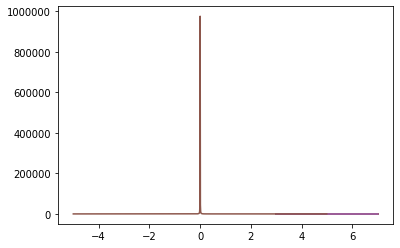

In [47]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

num_sims = 5 ### display five runs

t_init = 3
t_end  = 7
N      = 1000 ### Compute 1000 grid points
dt     = float(t_end - t_init) / N 
y_init = 0
fs = 10e2
c_theta = 0.7
c_mu    = 1.5
c_sigma = 0.06

def mu(y, t): 
    """Implement the Ornstein–Uhlenbeck mu.""" ## = \theta (\mu-Y_t)
    return c_theta * (c_mu - y)

def sigma(y, t): 
    """Implement the Ornstein–Uhlenbeck sigma.""" ## = \sigma
    return c_sigma
    
def dW(delta_t): 
    """Sample a random number at each call."""
    return np.random.normal(loc = 0.0, scale = np.sqrt(delta_t))

ts    = np.arange(t_init, t_end, dt)
ys    = np.zeros(N)

ys[0] = y_init

for _ in range(num_sims):
    for i in range(1, ts.size):
        t = (i-1) * dt
        y = ys[i-1]
        ys[i] = y + mu(y, t) * dt + sigma(y, t) * dW(dt)
    plt.plot(ts, ys)
ps = np.abs(np.fft.fft(ys))**2

time_step = 0.1
freqs = np.fft.fftfreq(ys.size, time_step)
idx = np.argsort(freqs)
plt.plot(freqs[idx], ps[idx])
plt.show()

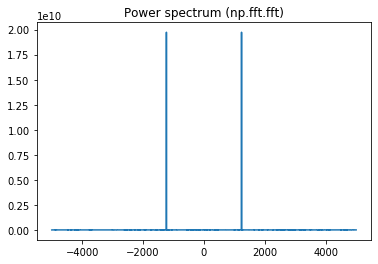

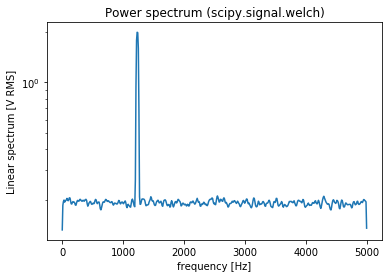

In [60]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

# np.fft.fft
freqs = np.fft.fftfreq(time.size, 1/fs)
idx = np.argsort(freqs)
ps = np.abs(np.fft.fft(x))**2
plt.figure()
plt.plot(freqs[idx], ps[idx])
plt.title('Power spectrum (np.fft.fft)')

# signal.welch
f, Pxx_spec = signal.welch(x, fs, 'flattop', 1024, scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.title('Power spectrum (scipy.signal.welch)')
plt.show()

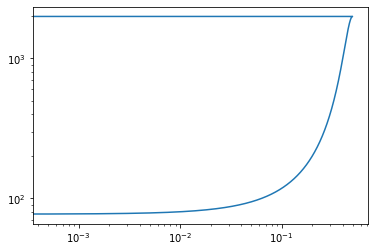

In [3]:
x = np.arange(-10, 10, 0.01)
y = 1.0/(1 + (0.5*x)**2)
ww = np.random.rand(2000)
z = np.fft.fft(y)+ ww*0
freq = np.fft.fftfreq(x.shape[-1])
yy = np.abs(np.fft.fft(z))
xx= np.fft.fftfreq(freq.shape[-1])
plt.loglog(xx, yy)